In [1]:
import ms3 
from  ms3.utils import *
import os 
from ms3 import Score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path_midi = '/home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/'
target = '/home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/'

dir_list = os.listdir(path_midi)

for el in dir_list:
    convert(path_midi+el, target+el[:-4]+'.mscx', MS='musescore3')

INFO     root -- utils.py (line 427) convert():
	Converted /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/Cheap Thrills(feat. Sean Paul)-Sia, Sean Paul.mid to /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/Cheap Thrills(feat. Sean Paul)-Sia, Sean Paul.mscx
INFO     root -- utils.py (line 427) convert():
	Converted /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/New rules-Dua Lipa.mid to /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/New rules-Dua Lipa.mscx
INFO     root -- utils.py (line 427) convert():
	Converted /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/Let Me Love You ft Justin Bieber-DJ Snake, Justin Bieber.mid to /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/Let Me Love You ft Justin Bieber-DJ Snake, Justin Bieber.mscx
INFO     root -- utils.py (line 427) convert():
	Converted /home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/Willow-Taylor Swift.mid to /home/nulpe

In [37]:
shape_of_you = '/home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/Shape of you-Ed Sheran.mscx'
s = Score(shape_of_you)
df_shape_of_you = s.mscx.notes

#make instrument dics
instrument_dict = {}
for key in s.mscx.metadata['parts']:
    for staff in s.mscx.metadata['parts'][key].keys():
        instrument_dict[staff] = key
        

1
2
3
4
5
6
7
8
9
{1: 'Marimba, untitled', 2: 'Marimba, untitled', 3: 'Melodic Drum', 4: 'Tenor Sax', 5: 'Overdrive Gtr', 6: 'Xylophone', 7: 'Woodblock', 8: 'Percussion', 9: 'Grand Piano'}


In [43]:
df_shape_of_you['quarter_beats'] = (df_shape_of_you.mc_onset*16).astype('int32')
df_shape_of_you['instrument'] = [instrument_dict[el] for el in df_shape_of_you.staff]
print(len(df_shape_of_you))
len(df_shape_of_you.instrument.unique())

1387


8

,count
quarter_beats,
0,400
1,6
2,57
3,5
4,83
5,36
6,200
7,31
8,136


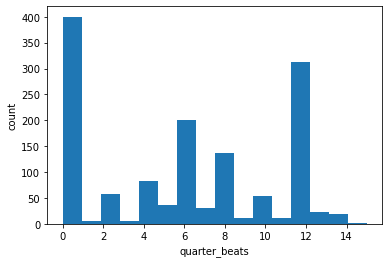

In [40]:
df_histogram = df_shape_of_you.groupby(['quarter_beats'])['mn'].agg(['count'])

plt.hist(df_shape_of_you['quarter_beats'], bins=16)
plt.xlabel('quarter_beats')
plt.ylabel('count')
df_histogram

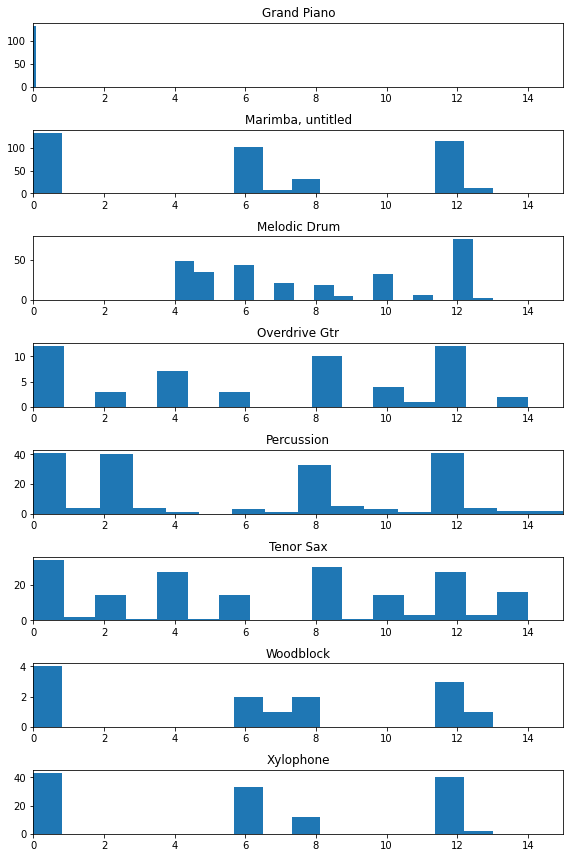

In [77]:
df_histogram = df_shape_of_you.groupby(['instrument']).agg(['count']).reset_index()
df_histogram.head(50)


fig, ax = plt.subplots(8, 1, figsize=(8, 12))


for idx, el in enumerate(df_histogram.instrument.unique()):
    df_curr = df_shape_of_you[df_shape_of_you['instrument'] == el]
    ax[idx].hist(df_curr['quarter_beats'], bins=16)
    ax[idx].set_xlim([0, 15])
    ax[idx].set_title(el)
fig.tight_layout(pad=1.0)

In [82]:
#s.mscx.metadata
dir_sheet_music = '/home/nulpe/Desktop/Tresillo/dataset/tresillo midi billboards/ms3/'
list_sheet_music = os.listdir(dir_sheet_music)

for idx, el in enumerate(list_sheet_music):
    s = Score(dir_sheet_music+el)
    df = s.mscx.notes
    if idx == 0:
        df_score = df
    else: df_score = pd.concat([df_score, df], axis = 0)

Text(0, 0.5, 'count')

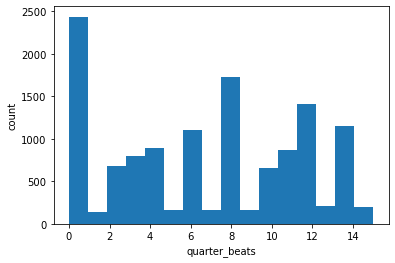

In [83]:
df_score['quarter_beats'] = (df_score.mc_onset*16).astype('int32')
df_histogram = df_score.groupby(['quarter_beats'])['mn'].agg(['count'])

plt.hist(df_score['quarter_beats'], bins=16)
plt.xlabel('quarter_beats')
plt.ylabel('count')


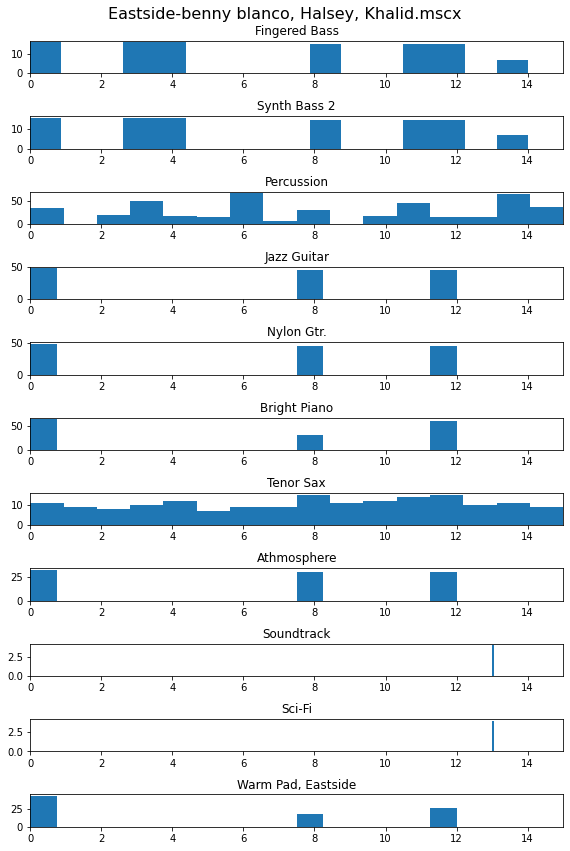

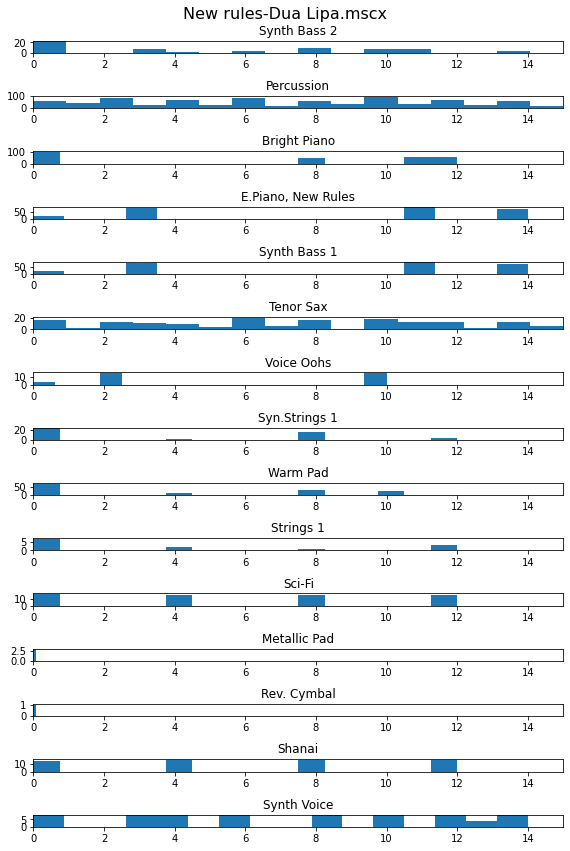

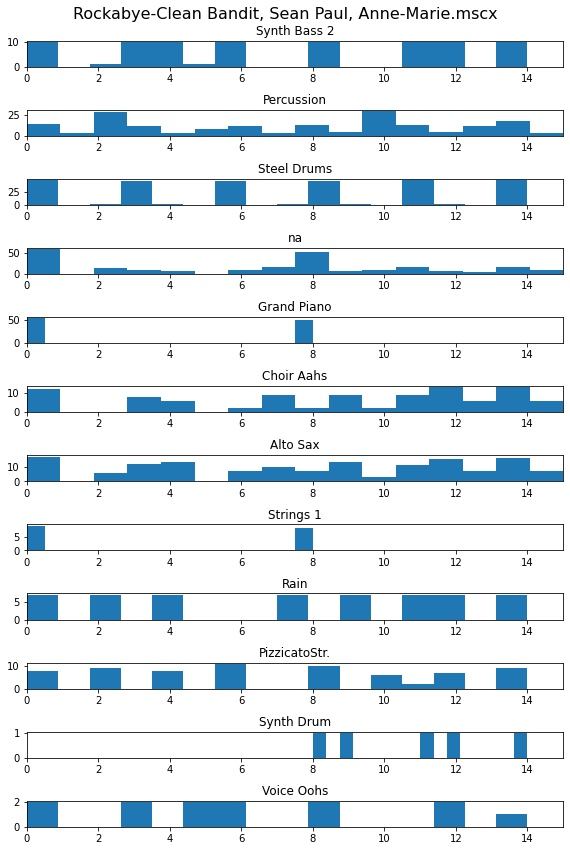

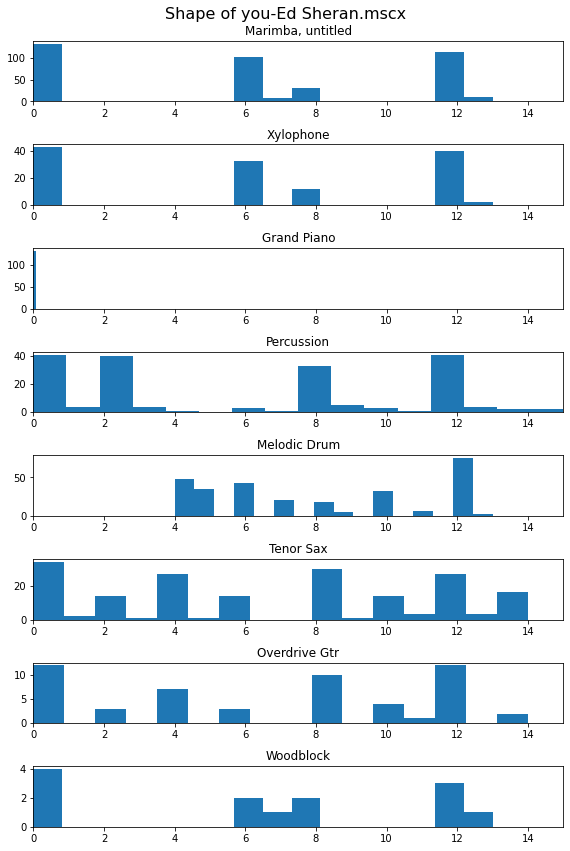

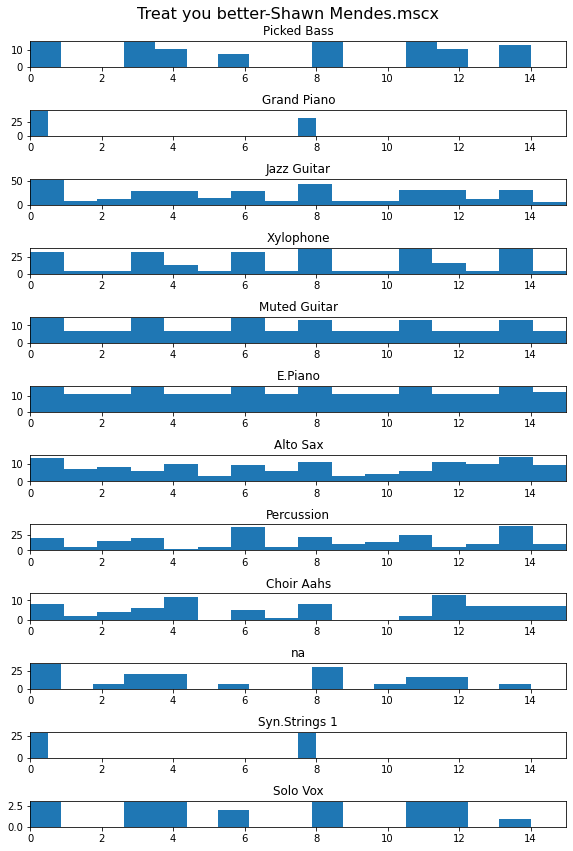

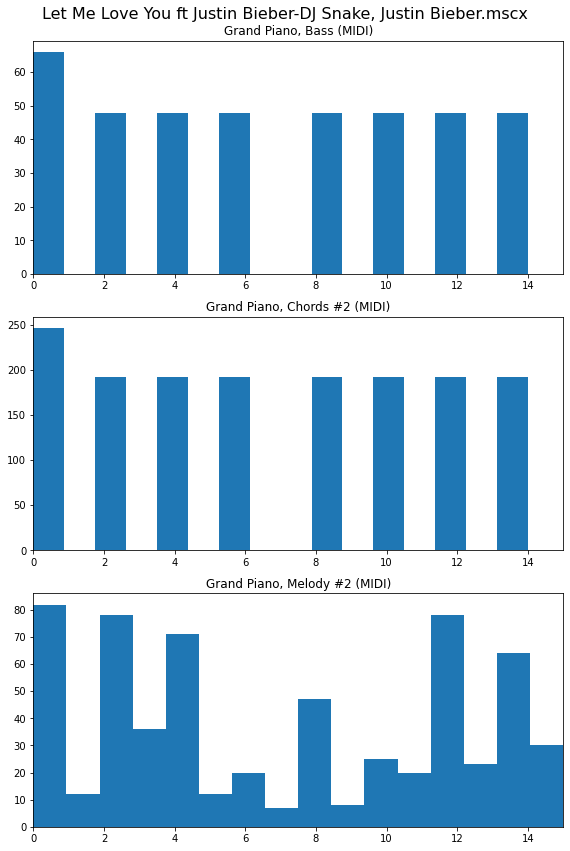

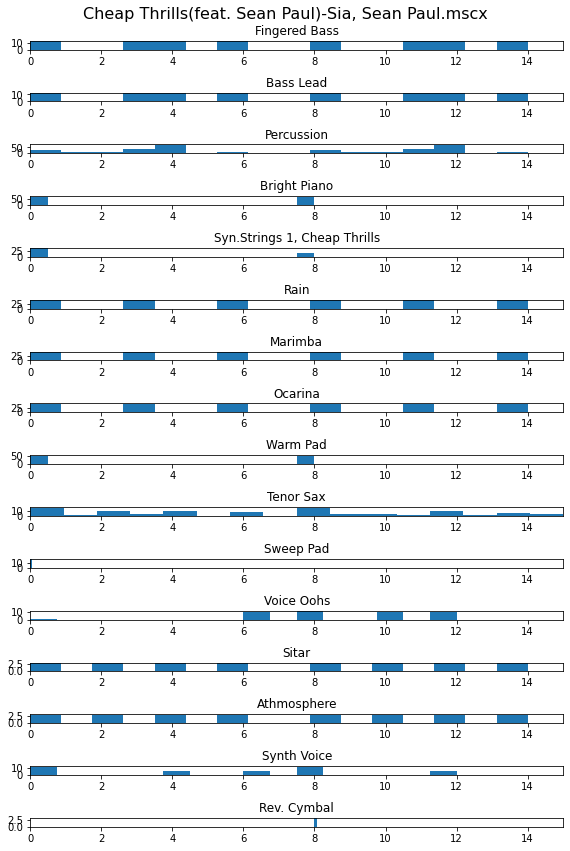

In [93]:
for idx, el in enumerate(list_sheet_music):
    #Get notes with onsets
    s = Score(dir_sheet_music+el)
    df = s.mscx.notes
    if idx == 0:
        df_score = df
    
    # Define instruments 
    instrument_dict = {}
    for key in s.mscx.metadata['parts']:
        for staff in s.mscx.metadata['parts'][key].keys():
            instrument_dict[staff] = key
            
    
    #staff to instruments 
    df['instrument'] = [instrument_dict[el] if el in instrument_dict else 'na' for el in df.staff]
    
    
    
    df['quarter_beats'] = (df.mc_onset*16).astype('int32')
    
    
    #plot distributions
    
    fig, ax = plt.subplots(len(df['instrument'].unique()), 1, figsize=(8, 12))
    fig.suptitle(el, fontsize=16)


    for idx, el in enumerate(df.instrument.unique()):
        df_curr = df[df['instrument'] == el]
        ax[idx].hist(df_curr['quarter_beats'], bins=16)
        ax[idx].set_xlim([0, 15])
        ax[idx].set_title(el)
    fig.tight_layout(pad=1.0)
    
    
    

## Self defined Tresillio


In [ ]:
dir_sheet_music = '/home/nulpe/Desktop/Tresillo/dataset/MSCX Tresillos/'